Missing Values Count:
Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64


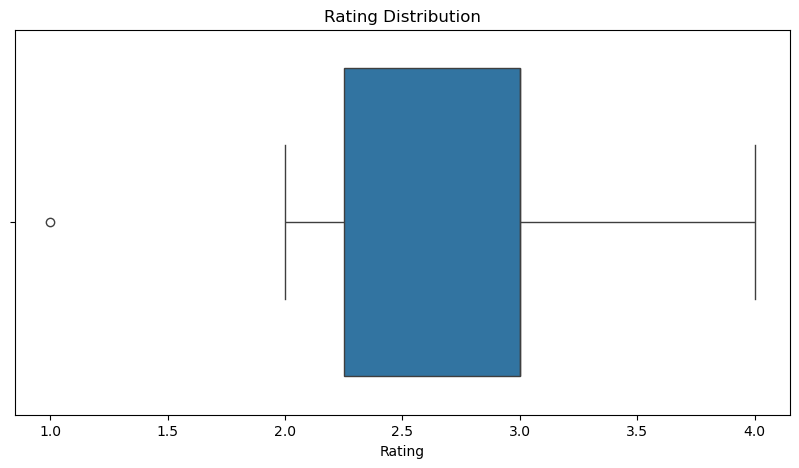

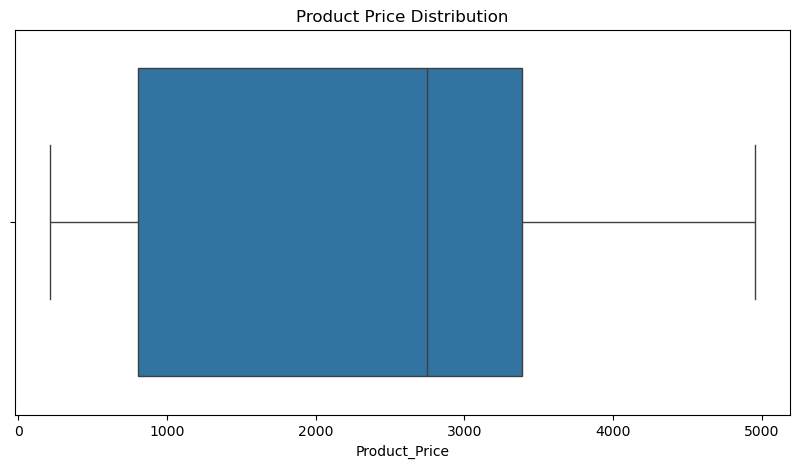

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Day 20_E-Commerce_Data.csv')

missing_values = df.isna().sum()
print("Missing Values Count:")
print(missing_values)

df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df['Review_Text'].fillna('No Review', inplace=True)
df.drop_duplicates(subset=['Review_Text'], keep='first', inplace=True)
df['Rating'] = df['Rating'].clip(1, 5)
df['Product_Category'] = df['Product_Category'].str.lower().str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Rating'])
plt.title("Rating Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Product_Price'])
plt.title("Product Price Distribution")
plt.show()
encoder = LabelEncoder()
df['Product_Category'] = encoder.fit_transform(df['Product_Category'])
df.to_csv('Day 20_Cleaned_E-Commerce_Data.csv', index=False)